In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
#os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\Loan Prediciton_AnalyticsVidhya\\train_aox2Jxw')
os.chdir('C:\\Users\\Administrator\\Desktop\\Data\\Loan Prediction Analytics Vidhya')
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [87]:
dataset=pd.read_csv('train.csv')


In [3]:
# Continuous Variable
# Boxplot
# Scatter Plot
# Strip Plot
# Swarn Plot
# Combine Plot

### Integer Columns

In [4]:
Integercolumns=dataset.select_dtypes(include=['int64','float64'])
Integercolumns.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [5]:
CategoricalColumns=dataset.select_dtypes(include='object')
CategoricalColumns.columns

Index(['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH'],
      dtype='object')

## Functions

In [6]:
def Continuouscolumnsanalysis(data,column,catcolumn):
    print('Distribution plot between {} and {}'.format(column,catcolumn))
    sns.FacetGrid(data,hue=catcolumn,size=5)\
        .map(sns.distplot,column)\
        .add_legend()
    plt.xlim(0,140000)
    plt.show()
    plt.figure(figsize=(8,8))
    print('Distribution plot between {}'.format(column))
    plt.boxplot(data[column])
    #plt.ylim(0,140000)
    plt.show()
    print('Box plot between {} and {}'.format(column,catcolumn))
    sns.boxplot(x=catcolumn,y=column,data=data)
    #plt.ylim(0,140000)
    plt.show()
    summary=dataset[column].describe()
    print(summary)
    print('*'*50)
    IQR=summary['75%']-summary['25%']
    
    UpperBoundary=summary['75%']
    lowerboundary=summary['25%']
    
    UpperViscour=UpperBoundary+1.5*(IQR)
    LowerViscour=lowerboundary-1.5*(IQR)
    
    UpperViscour3=UpperBoundary+3*(IQR)
    LowerViscour3=lowerboundary-3*(IQR)
    
    print('Inter-quartile range 1.5 is IQR {IQR} lower_band {lower_band} and Upperband {upperband}'.format(IQR=IQR,lower_band=LowerViscour,upperband=UpperViscour))
    print('Total # of records greater than Upper Viscour {} which is of {}'.format(data.loc[dataset[column]>UpperViscour,:].shape[0],float((data.loc[dataset[column]>UpperViscour,:].shape[0]/data.shape[0]))*100))
    print('Total # of records greater than Lower Viscour {} which is of {}'.format(data.loc[dataset[column]<LowerViscour,:].shape[0],float((data.loc[dataset[column]<LowerViscour,:].shape[0]/data.shape[0]))*100))
    
    print('Inter-quartile range 3 is IQR {IQR} lower_band {lower_band} and Upperband {upperband}'.format(IQR=IQR,lower_band=LowerViscour3,upperband=UpperViscour3))
    print('Total # of records greater than 3 Upper Viscour {} which is of {}'.format(data.loc[dataset[column]>UpperViscour3,:].shape[0],float((data.loc[dataset[column]>UpperViscour3,:].shape[0]/data.shape[0]))*100))
    print('Total # of records greater than 3 Lower Viscour {} which is of {}'.format(data.loc[dataset[column]<LowerViscour3,:].shape[0],float((data.loc[dataset[column]<LowerViscour3,:].shape[0]/data.shape[0]))*100))

## disbursed_amount

Distribution plot between disbursed_amount and loan_default


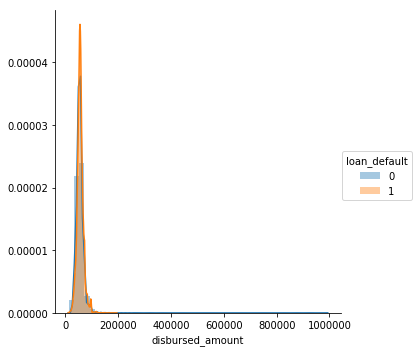

Distribution plot between disbursed_amount


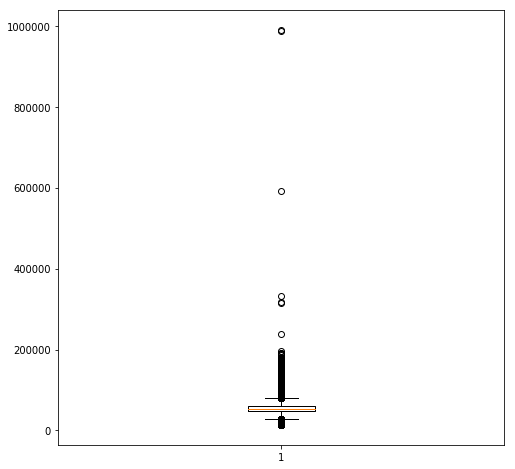

Box plot between disbursed_amount and loan_default


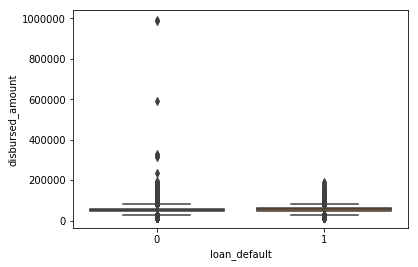

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64
**************************************************
Inter-quartile range 1.5 is IQR 13268.0 lower_band 27243.0 and Upperband 80315.0
Total # of records greater than Upper Viscour 7248 which is of 3.1086749530353326
Total # of records greater than Lower Viscour 2620 which is of 1.1237208025596817
Inter-quartile range 3 is IQR 13268.0 lower_band 7341.0 and Upperband 100217.0
Total # of records greater than 3 Upper Viscour 834 which is of 0.3577034921125093
Total # of records greater than 3 Lower Viscour 0 which is of 0.0


In [7]:
Continuouscolumnsanalysis(dataset,'disbursed_amount','loan_default')
## Binning the values above upper viscous and lower viscous
dataset['disbursed_amount']=[80315.0 if dataset['disbursed_amount'][i]>80315.0 else dataset['disbursed_amount'][i] for i in range(len(dataset['disbursed_amount']))]
dataset['disbursed_amount']=[27243.0 if dataset['disbursed_amount'][i]<27243.0 else dataset['disbursed_amount'][i] for i in range(len(dataset['disbursed_amount']))]

## asset_cost

Distribution plot between asset_cost and loan_default


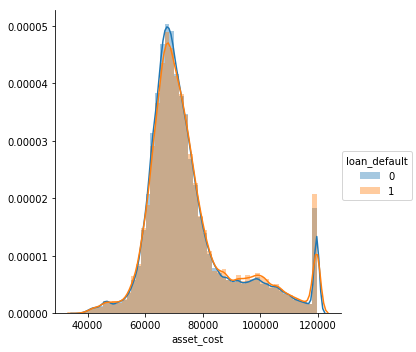

Distribution plot between asset_cost


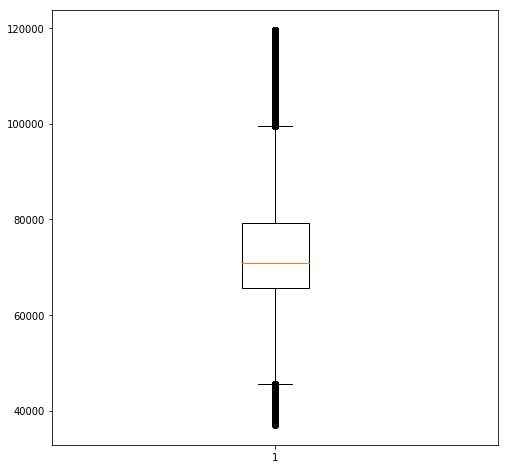

Box plot between asset_cost and loan_default


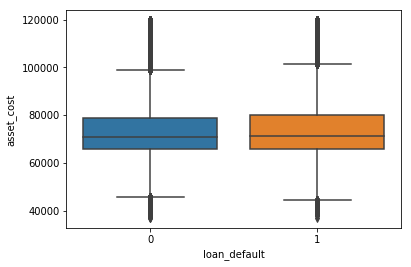

count    233154.000000
mean      75050.516405
std       15207.109904
min       37000.000000
25%       65717.000000
50%       70946.000000
75%       79201.750000
max      119656.000000
Name: asset_cost, dtype: float64
**************************************************
Inter-quartile range 1.5 is IQR 13484.75 lower_band 45489.875 and Upperband 99428.875
Total # of records greater than Upper Viscour 22937 which is of 9.837703835233365
Total # of records greater than Lower Viscour 1451 which is of 0.6223354521046175
Inter-quartile range 3 is IQR 13484.75 lower_band 25262.75 and Upperband 119656.0
Total # of records greater than 3 Upper Viscour 0 which is of 0.0
Total # of records greater than 3 Lower Viscour 0 which is of 0.0


In [8]:
dataset['asset_cost']=[119656.0 if dataset['asset_cost'][i]>119656.0 else dataset['asset_cost'][i] for i in range(len(dataset['asset_cost']))]
dataset['asset_cost']=[25262.75 if dataset['asset_cost'][i]<25262.75 else dataset['asset_cost'][i] for i in range(len(dataset['asset_cost']))]
Continuouscolumnsanalysis(dataset,'asset_cost','loan_default')

## Functions

In [32]:
def categoricalvariableanalysis(data,cat1,cat2):
    print('Total Number of Unique values in {} are {}'.format(cat1,len(data[cat1].unique())))
    plt.figure(figsize=(20,4))
    sns.countplot(x=cat1,hue=cat2,data=data,dodge=False)
    plt.show()
    contingencytable=contingency_matrix(data[cat1],data[cat2])
    sns.heatmap(contingencytable,fmt='g',annot=True)
    plt.show()
    print('Value Counts \n',dataset[cat1].value_counts())
    print('Value Counts \n',dataset[cat1].value_counts()/dataset.shape[0]*100)

## branch_id

In [10]:
pd.set_option('display.max_rows', None)
Frequency_branch_id=dataset['branch_id'].value_counts()/dataset['branch_id'].shape[0]*100
[i for i in Frequency_branch_id if i>6]

[]

Total Number of Unique values in branch_id are 82


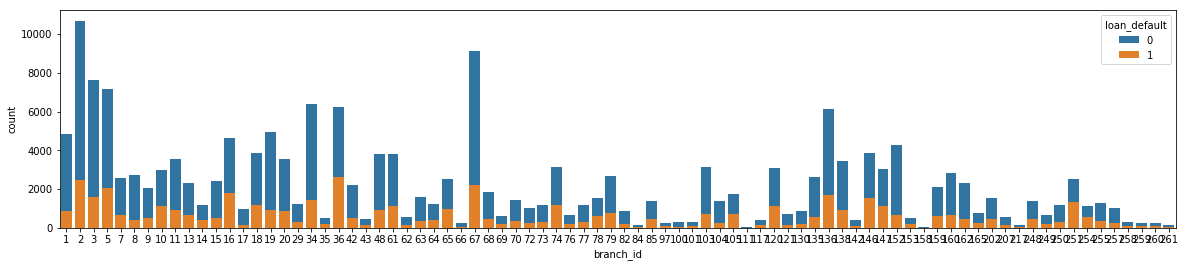

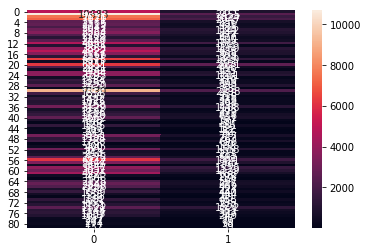

In [11]:
categoricalvariableanalysis(dataset,'branch_id','loan_default')

## Supplier ID

In [12]:
pd.set_option('display.max_rows', None)
Frequency_branch_id=dataset['supplier_id'].value_counts()/dataset['supplier_id'].shape[0]*100
[i for i in Frequency_branch_id if i>6]

[]

Total Number of Unique values in supplier_id are 2953


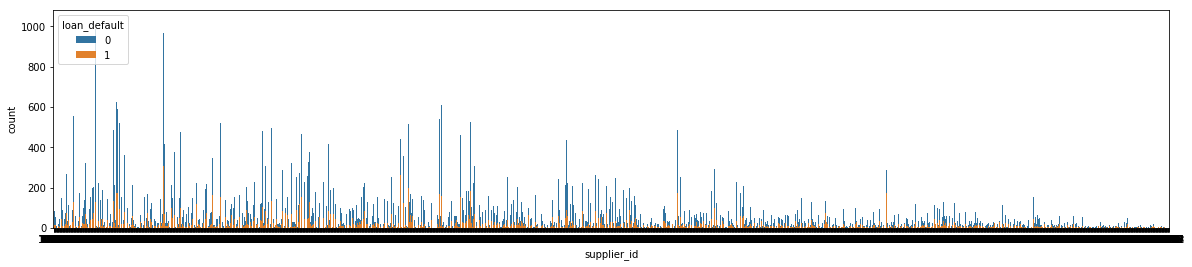

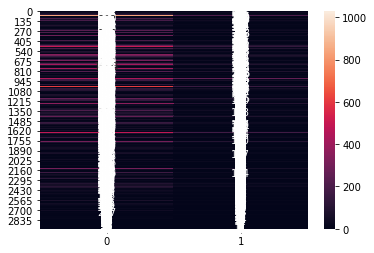

In [13]:
categoricalvariableanalysis(dataset,'supplier_id','loan_default')

## manufacturer_id

In [14]:
pd.set_option('display.max_rows', None)
Frequency_branch_id=dataset['manufacturer_id'].value_counts()/dataset['manufacturer_id'].shape[0]*100
dataset['manufacturer_id']=[99 if Frequency_branch_id[dataset['manufacturer_id'][i]]<12 else dataset['manufacturer_id'][i] for i in range(len(dataset['manufacturer_id']))]

Total Number of Unique values in manufacturer_id are 3


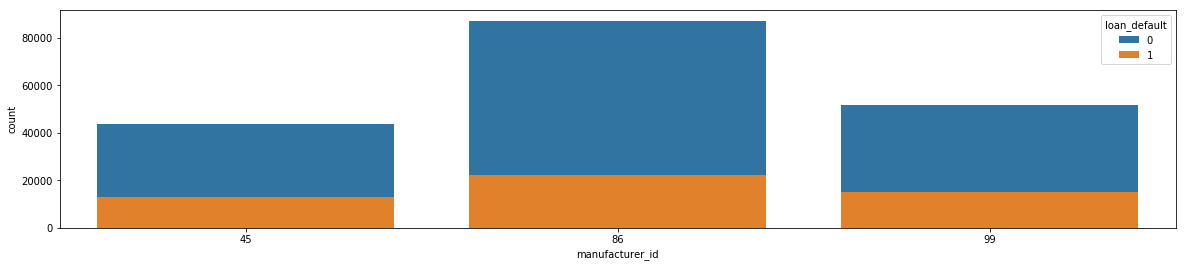

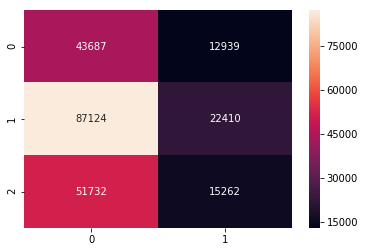

In [15]:
categoricalvariableanalysis(dataset,'manufacturer_id','loan_default')

## Date of Birth

In [16]:
from datetime import datetime

from datetime import datetime
dataset['DateofBirth']=[datetime.strptime(dataset['Date.of.Birth'][i],'%d-%m-%y') for i in range(len(dataset['Date.of.Birth']))]

In [17]:
import datetime
x = datetime.datetime.now()
currentyear=int(x.strftime("%Y"))
#currentyear=int(currentyear)
currentyear
dataset['DateofBirth']=pd.to_datetime(dataset['Date.of.Birth'])
dataset['year'] = dataset['DateofBirth'].dt.year
dataset['age']=[currentyear-(int(dataset['year'][i])-100) if dataset['year'][i]>2000 else currentyear-int(dataset['year'][i]) for i in range(len(dataset['year']))]

Distribution plot between age and loan_default


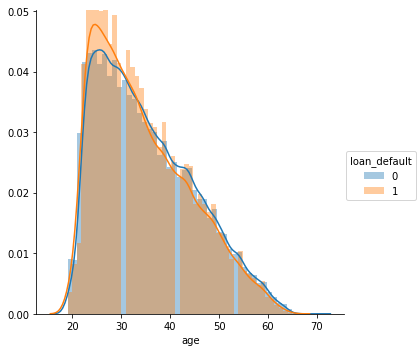

Distribution plot between age


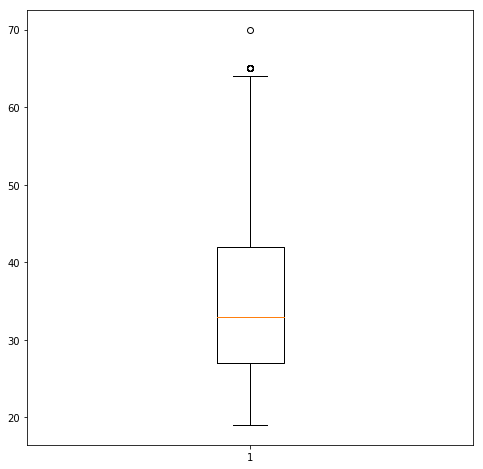

Box plot between age and loan_default


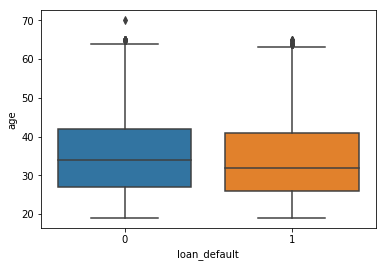

count    233154.000000
mean         35.100946
std           9.805992
min          19.000000
25%          27.000000
50%          33.000000
75%          42.000000
max          70.000000
Name: age, dtype: float64
**************************************************
Inter-quartile range 1.5 is IQR 15.0 lower_band 4.5 and Upperband 64.5
Total # of records greater than Upper Viscour 22 which is of 0.009435823532943892
Total # of records greater than Lower Viscour 0 which is of 0.0
Inter-quartile range 3 is IQR 15.0 lower_band -18.0 and Upperband 87.0
Total # of records greater than 3 Upper Viscour 0 which is of 0.0
Total # of records greater than 3 Lower Viscour 0 which is of 0.0


In [18]:
Continuouscolumnsanalysis(dataset,'age','loan_default')

In [19]:
## Employment Type

Total Number of Unique values in Employment.Type are 3


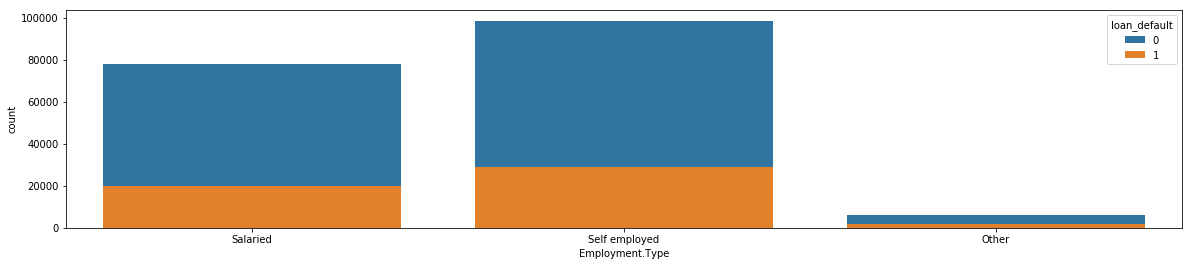

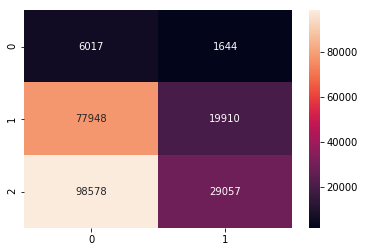

Value Counts 
 Self employed    127635
Salaried          97858
Other              7661
Name: Employment.Type, dtype: int64


In [24]:
#dataset.loc[dataset['Employment.Type'].isnull(),:]
dataset['Employment.Type'].fillna('Other',inplace=True)
categoricalvariableanalysis(dataset,'Employment.Type','loan_default')

In [25]:
import datetime
x = datetime.datetime.now()
currentyear=int(x.strftime("%Y"))
#currentyear=int(currentyear)
currentyear
dataset['DateofBirth']=pd.to_datetime(dataset['DisbursalDate'])
dataset['year'] = dataset['DateofBirth'].dt.year
dataset['Loan_Age']=[currentyear-(int(dataset['year'][i])-100) if dataset['year'][i]>2000 else currentyear-int(dataset['year'][i]) for i in range(len(dataset['year']))]

Distribution plot between Loan_Age and loan_default


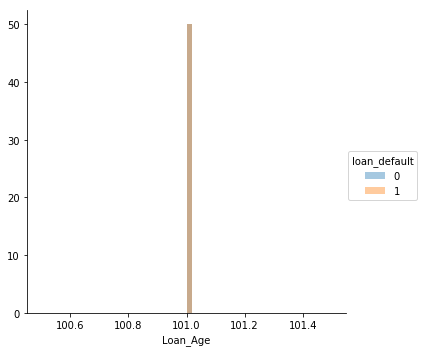

Distribution plot between Loan_Age


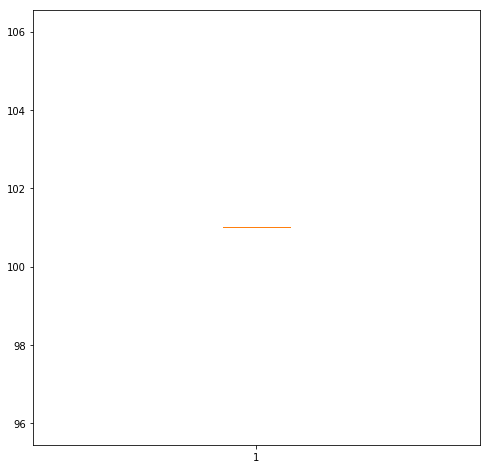

Box plot between Loan_Age and loan_default


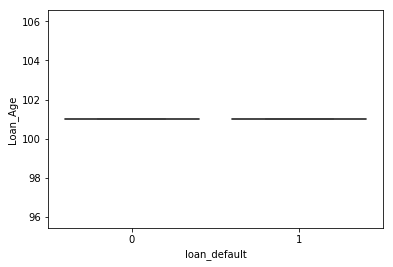

count    233154.0
mean        101.0
std           0.0
min         101.0
25%         101.0
50%         101.0
75%         101.0
max         101.0
Name: Loan_Age, dtype: float64
**************************************************
Inter-quartile range 1.5 is IQR 0.0 lower_band 101.0 and Upperband 101.0
Total # of records greater than Upper Viscour 0 which is of 0.0
Total # of records greater than Lower Viscour 0 which is of 0.0
Inter-quartile range 3 is IQR 0.0 lower_band 101.0 and Upperband 101.0
Total # of records greater than 3 Upper Viscour 0 which is of 0.0
Total # of records greater than 3 Lower Viscour 0 which is of 0.0


In [26]:
Continuouscolumnsanalysis(dataset,'Loan_Age','loan_default')

## State_ID

In [38]:
pd.set_option('display.max_rows', None)
Frequency_state_id=dataset['State_ID'].value_counts()/dataset['State_ID'].shape[0]*100
dataset['State_ID']=[99 if Frequency_state_id[dataset['State_ID'][i]]<5 else dataset['State_ID'][i] for i in range(len(dataset['State_ID']))]

Total Number of Unique values in State_ID are 7


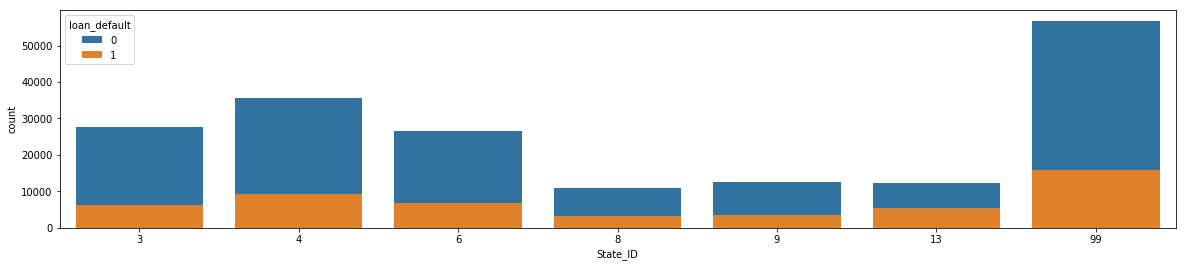

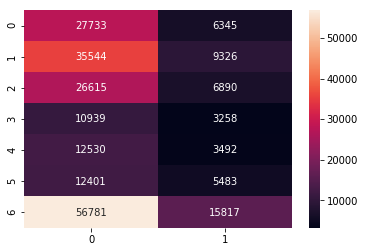

Value Counts 
 99    72598
4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
Name: State_ID, dtype: int64
Value Counts 
 99    31.137360
4     19.244791
3     14.616091
6     14.370330
13     7.670467
9      6.871853
8      6.089108
Name: State_ID, dtype: float64


In [39]:
categoricalvariableanalysis(dataset,'State_ID','loan_default')

## MobileNo_Avl_Flag

Total Number of Unique values in MobileNo_Avl_Flag are 1


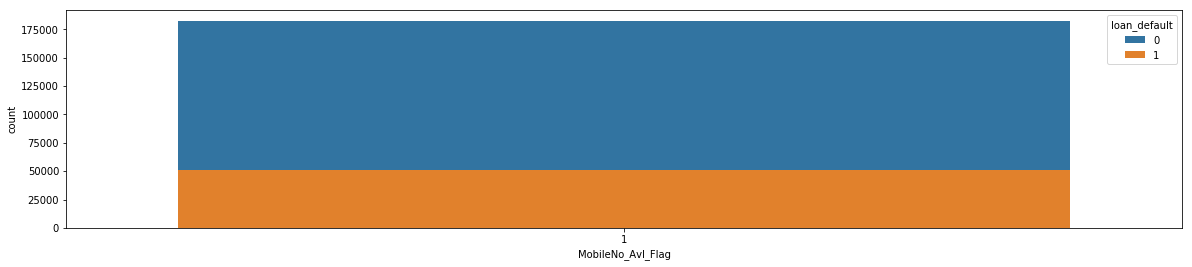

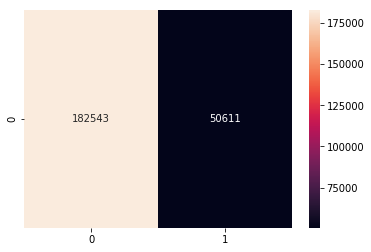

Value Counts 
 1    233154
Name: MobileNo_Avl_Flag, dtype: int64
Value Counts 
 1    100.0
Name: MobileNo_Avl_Flag, dtype: float64


In [41]:
categoricalvariableanalysis(dataset,'MobileNo_Avl_Flag','loan_default')

## Aadhar_flag

Total Number of Unique values in Aadhar_flag are 2


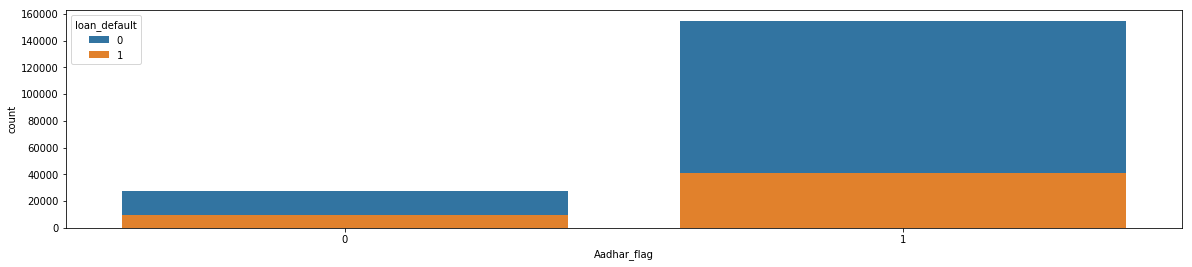

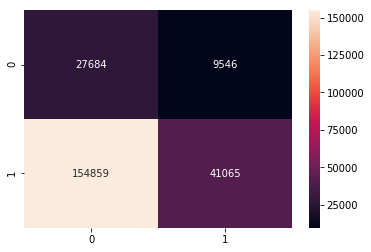

Value Counts 
 1    195924
0     37230
Name: Aadhar_flag, dtype: int64
Value Counts 
 1    84.032013
0    15.967987
Name: Aadhar_flag, dtype: float64


In [42]:
categoricalvariableanalysis(dataset,'Aadhar_flag','loan_default')

## PAN_flag

Total Number of Unique values in PAN_flag are 2


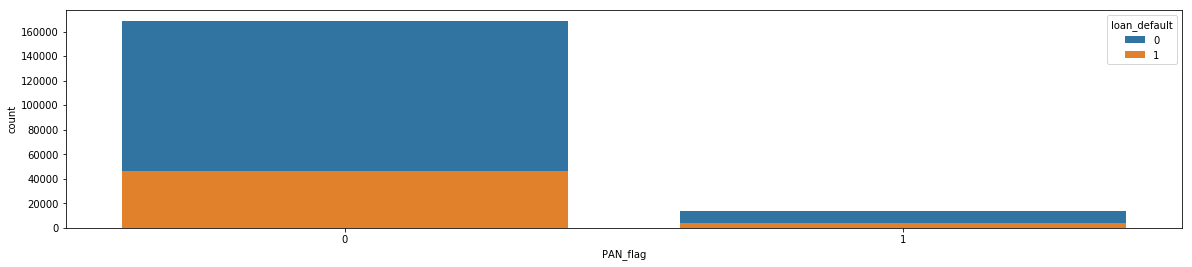

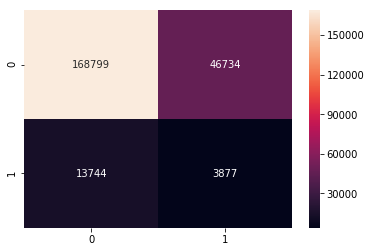

Value Counts 
 0    215533
1     17621
Name: PAN_flag, dtype: int64
Value Counts 
 0    92.442334
1     7.557666
Name: PAN_flag, dtype: float64


In [43]:
categoricalvariableanalysis(dataset,'PAN_flag','loan_default')

## VoterID_flag

Total Number of Unique values in VoterID_flag are 2


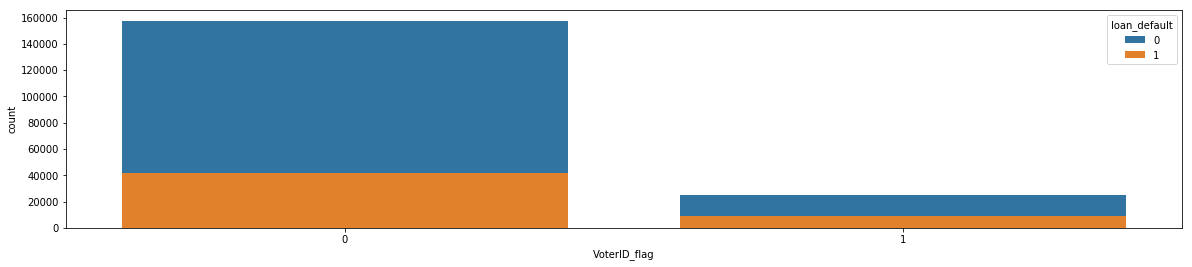

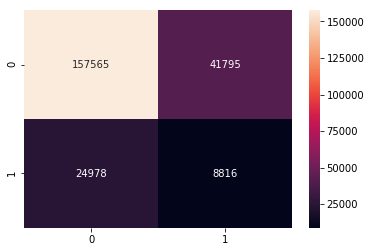

Value Counts 
 0    199360
1     33794
Name: VoterID_flag, dtype: int64
Value Counts 
 0    85.505717
1    14.494283
Name: VoterID_flag, dtype: float64


In [44]:
categoricalvariableanalysis(dataset,'VoterID_flag','loan_default')

## Driving_flag

Total Number of Unique values in Driving_flag are 2


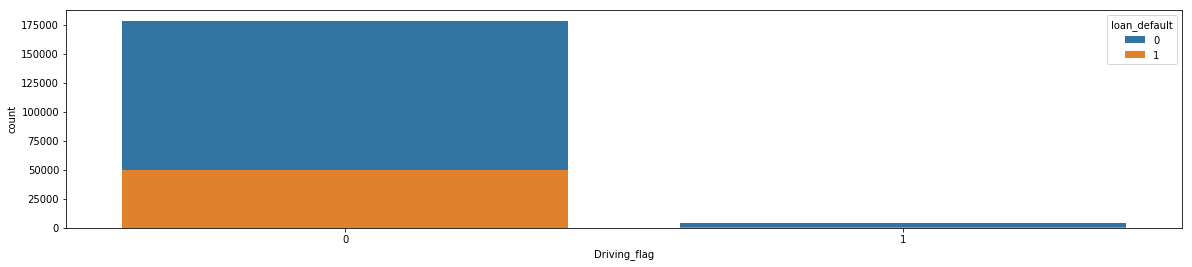

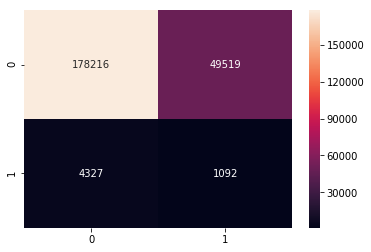

Value Counts 
 0    227735
1      5419
Name: Driving_flag, dtype: int64
Value Counts 
 0    97.675785
1     2.324215
Name: Driving_flag, dtype: float64


In [45]:
categoricalvariableanalysis(dataset,'Driving_flag','loan_default')

In [47]:
## Passport_flag

Total Number of Unique values in Passport_flag are 2


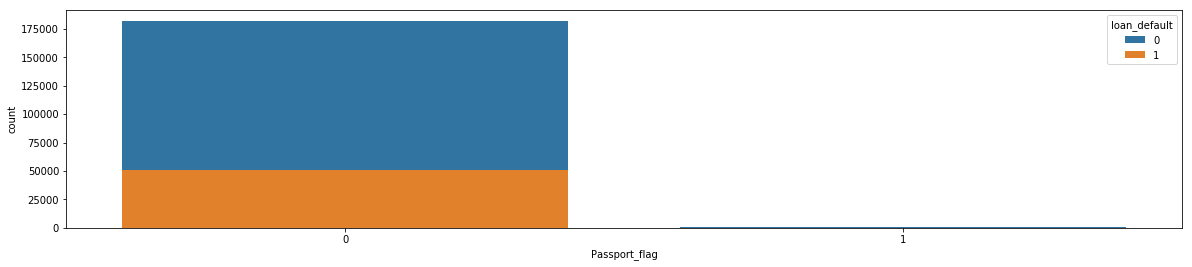

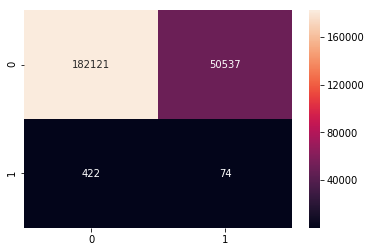

Value Counts 
 0    232658
1       496
Name: Passport_flag, dtype: int64
Value Counts 
 0    99.787265
1     0.212735
Name: Passport_flag, dtype: float64


In [46]:
categoricalvariableanalysis(dataset,'Passport_flag','loan_default')

## 'PERFORM_CNS.SCORE.DESCRIPTION'

Total Number of Unique values in PERFORM_CNS.SCORE.DESCRIPTION are 7


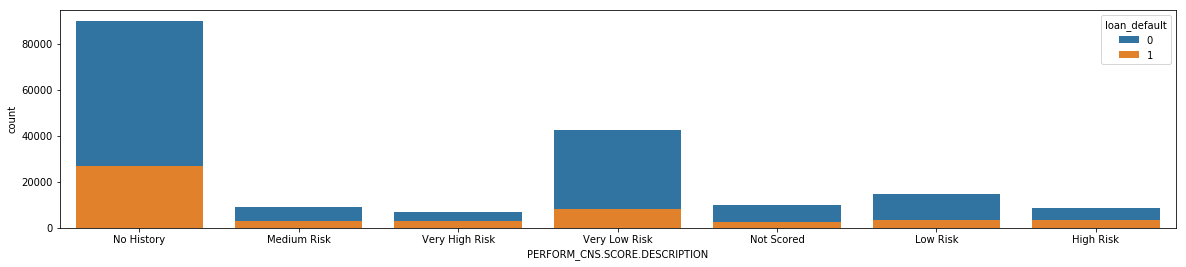

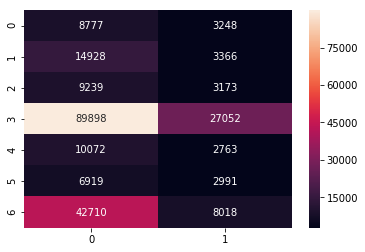

Value Counts 
 No History        116950
Very Low Risk      50728
Low Risk           18294
Not Scored         12835
Medium Risk        12412
High Risk          12025
Very High Risk      9910
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64
Value Counts 
 No History        50.159980
Very Low Risk     21.757293
Low Risk           7.846316
Not Scored         5.504945
Medium Risk        5.323520
High Risk          5.157535
Very High Risk     4.250410
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: float64


In [91]:
categoricalvariableanalysis(dataset,'PERFORM_CNS.SCORE.DESCRIPTION','loan_default')

In [88]:
Group={'C-Very Low Risk':'Very Low Risk','A-Very Low Risk':'Very Low Risk','D-Very Low Risk':'Very Low Risk',
       'B-Very Low Risk':'Very Low Risk','F-Low Risk':'Low Risk','E-Low Risk':'Low Risk',
        'G-Low Risk':'Low Risk','K-High Risk':'High Risk','J-High Risk':'High Risk',
       'Not Scored: Sufficient History Not Available':'Not Scored',
       'Not Scored: Not Enough Info available on the customer':'Not Scored',
       'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored',
       'Not Scored: No Updates available in last 36 months':'Not Scored',
       'Not Scored: Only a Guarantor':'Not Scored',
       'Not Scored: More than 50 active Accounts found':'Not Scored',
       'No Bureau History Available':'No History',
       'H-Medium Risk':'Medium Risk','I-Medium Risk':'Medium Risk','L-Very High Risk':'Very High Risk',
       'M-Very High Risk':'Very High Risk'}
dataset['PERFORM_CNS.SCORE.DESCRIPTION']=dataset['PERFORM_CNS.SCORE.DESCRIPTION'].map(Group)

20

## PRI.OVERDUE.ACCTS

Distribution plot between PRI.OVERDUE.ACCTS and loan_default


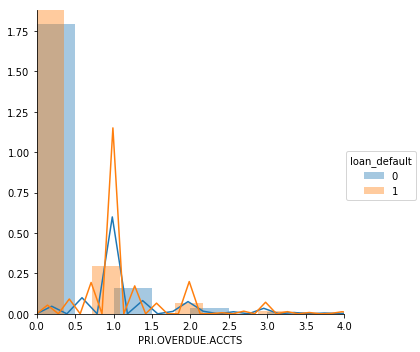

Box plot between PRI.OVERDUE.ACCTS


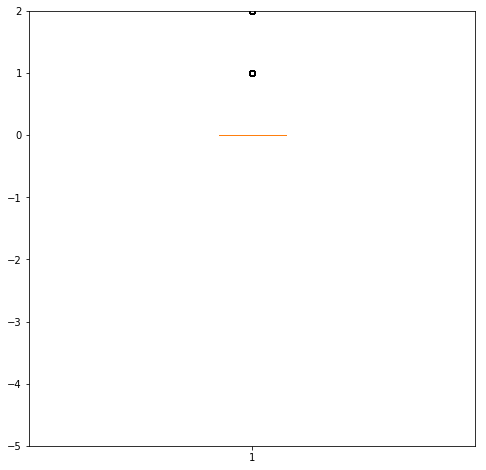

Box plot between PRI.OVERDUE.ACCTS and loan_default


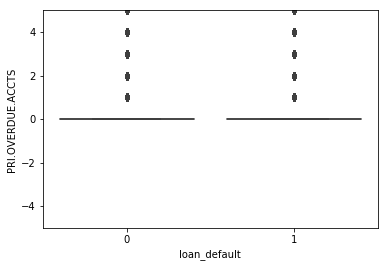

count    233154.000000
mean          0.156549
std           0.548787
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: PRI.OVERDUE.ACCTS, dtype: float64
**************************************************
Inter-quartile range 1.5 is IQR 0.0 lower_band 0.0 and Upperband 0.0
Total # of records greater than Upper Viscour 26275 which is of 11.269375605822761
Total # of records greater than Lower Viscour 0 which is of 0.0
Inter-quartile range 3 is IQR 0.0 lower_band 0.0 and Upperband 0.0
Total # of records greater than 3 Upper Viscour 26275 which is of 11.269375605822761
Total # of records greater than 3 Lower Viscour 0 which is of 0.0


In [113]:
Continuouscolumnsanalysis(dataset,'PRI.OVERDUE.ACCTS','loan_default')

In [114]:
dataset['PRI.NO.OF.ACCTS_Transformed']=['<lessthan3' if dataset['PRI.NO.OF.ACCTS'][i]<=3 else '3to7' if dataset['PRI.NO.OF.ACCTS'][i]>3 and dataset['PRI.NO.OF.ACCTS'][i]<=7 else 'greaterthan7' for i in range(len(dataset['PRI.NO.OF.ACCTS']))]

In [115]:
dataset['PRI.ACTIVE.ACCTS_Transformed']=['1' if dataset['PRI.ACTIVE.ACCTS'][i]<=1 else '2' if dataset['PRI.ACTIVE.ACCTS'][i]>1 and dataset['PRI.ACTIVE.ACCTS'][i]<=2 else 'greaterthan2' for i in range(len(dataset['PRI.ACTIVE.ACCTS']))]

In [116]:
dataset['PRI.OVERDUE.ACCTS_Transformed']=['0' if dataset['PRI.OVERDUE.ACCTS'][i]<1 else '1to5' if dataset['PRI.OVERDUE.ACCTS'][i]>=1 and dataset['PRI.OVERDUE.ACCTS'][i]<=5 else 'greaterthan5' for i in range(len(dataset['PRI.OVERDUE.ACCTS']))]

In [137]:
def Continuouscolumnsanalysis(data,column,catcolumn):
    print('Distribution plot between {} and {}'.format(column,catcolumn))
    sns.FacetGrid(data,hue=catcolumn,size=5)\
        .map(sns.distplot,column)\
        .add_legend()
    #plt.xlim(30000,2000000)
    plt.show()
    plt.figure(figsize=(8,8))
    print('Box plot between {}'.format(column))
    plt.boxplot(data[column])
    plt.ylim(-5,10000)
    plt.show()
    print('Box plot between {} and {}'.format(column,catcolumn))
    sns.boxplot(x=catcolumn,y=column,data=data)
    plt.ylim(0,10000)
    plt.show()
    summary=dataset[column].describe()
    print(summary)
    print('*'*50)
    IQR=summary['75%']-summary['25%']
    
    UpperBoundary=summary['75%']
    lowerboundary=summary['25%']
    
    UpperViscour=UpperBoundary+1.5*(IQR)
    LowerViscour=lowerboundary-1.5*(IQR)
    
    UpperViscour3=UpperBoundary+3*(IQR)
    LowerViscour3=lowerboundary-3*(IQR)
    
    print('Inter-quartile range 1.5 is IQR {IQR} lower_band {lower_band} and Upperband {upperband}'.format(IQR=IQR,lower_band=LowerViscour,upperband=UpperViscour))
    print('Total # of records greater than Upper Viscour {} which is of {}'.format(data.loc[dataset[column]>UpperViscour,:].shape[0],float((data.loc[dataset[column]>UpperViscour,:].shape[0]/data.shape[0]))*100))
    print('Total # of records greater than Lower Viscour {} which is of {}'.format(data.loc[dataset[column]<LowerViscour,:].shape[0],float((data.loc[dataset[column]<LowerViscour,:].shape[0]/data.shape[0]))*100))
    
    print('Inter-quartile range 3 is IQR {IQR} lower_band {lower_band} and Upperband {upperband}'.format(IQR=IQR,lower_band=LowerViscour3,upperband=UpperViscour3))
    print('Total # of records greater than 3 Upper Viscour {} which is of {}'.format(data.loc[dataset[column]>UpperViscour3,:].shape[0],float((data.loc[dataset[column]>UpperViscour3,:].shape[0]/data.shape[0]))*100))
    print('Total # of records greater than 3 Lower Viscour {} which is of {}'.format(data.loc[dataset[column]<LowerViscour3,:].shape[0],float((data.loc[dataset[column]<LowerViscour3,:].shape[0]/data.shape[0]))*100))

Distribution plot between PRI.CURRENT.BALANCE and loan_default


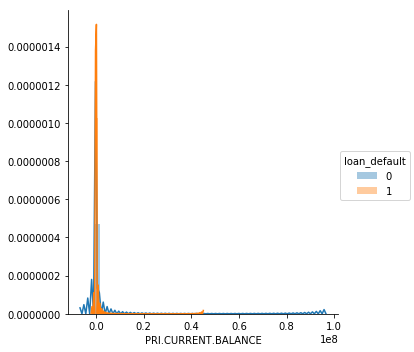

Box plot between PRI.CURRENT.BALANCE


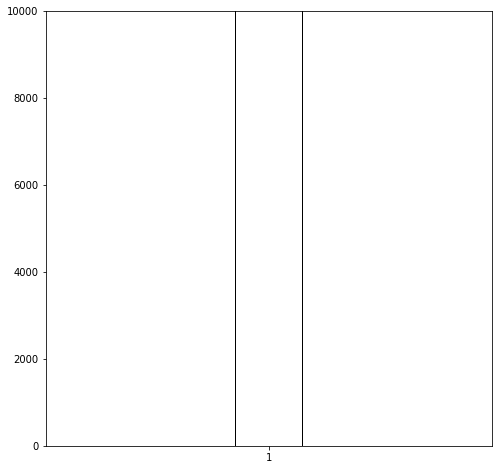

Box plot between PRI.CURRENT.BALANCE and loan_default


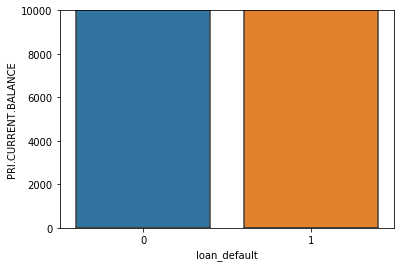

count    2.331540e+05
mean     1.659001e+05
std      9.422736e+05
min     -6.678296e+06
25%      0.000000e+00
50%      0.000000e+00
75%      3.500650e+04
max      9.652492e+07
Name: PRI.CURRENT.BALANCE, dtype: float64
**************************************************
Inter-quartile range 1.5 is IQR 35006.5 lower_band -52509.75 and Upperband 87516.25
Total # of records greater than Upper Viscour 40991 which is of 17.581083747222863
Total # of records greater than Lower Viscour 53 which is of 0.022731756693001193
Inter-quartile range 3 is IQR 35006.5 lower_band -105019.5 and Upperband 140026.0
Total # of records greater than 3 Upper Viscour 33777 which is of 14.486991430556628
Total # of records greater than 3 Lower Viscour 29 which is of 0.012438131020698765


In [138]:
Continuouscolumnsanalysis(dataset,'PRI.CURRENT.BALANCE','loan_default')

In [9]:
dataset=dataset.drop(columns=['UniqueID','disbursed_amount','asset_cost','branch_id','supplier_id','manufacturer_id','Current_pincode_ID','Date.of.Birth','Employment.Type','DisbursalDate','Employee_code_ID','MobileNo_Avl_Flag','PAN_flag','Driving_flag','Passport_flag',''])
dataset.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
